<a href="https://colab.research.google.com/github/nick1287/Airlines/blob/main/Airlines%2BProyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Adquisition y Análisis del dataset

In [12]:
# importación de librerías a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # herramienta de visualizacion
import seaborn as sns # herramienta de visualizacion
import plotly.express as px # herramienta de visualizacion
from sklearn.preprocessing import OneHotEncoder # Para hacer una clasificacion binaria de las variables

In [2]:
# creación del DataFrame 'df' mediante la lectura del archivo .csv
df = pd.read_csv('Airlines.csv',index_col=0)

In [19]:
# vista del data frame
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269.0,SFO,IAH,3.0,15.0,205.0,1.0
2,US,1558.0,PHX,CLT,3.0,15.0,222.0,1.0
3,AA,2400.0,LAX,DFW,3.0,20.0,165.0,1.0
4,AA,2466.0,SFO,DFW,3.0,20.0,195.0,1.0
5,AS,108.0,ANC,SEA,3.0,30.0,202.0,0.0


In [4]:
# se visualiza la nueva forma del dataframe a utilizar.
df.shape

(155102, 8)

In [5]:
# se obtiene la información sobre registros válidos y tipo de datos de las columnas.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155102 entries, 1 to 155102
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      155102 non-null  object 
 1   Flight       155101 non-null  float64
 2   AirportFrom  155101 non-null  object 
 3   AirportTo    155101 non-null  object 
 4   DayOfWeek    155101 non-null  float64
 5   Time         155101 non-null  float64
 6   Length       155101 non-null  float64
 7   Delay        155101 non-null  float64
dtypes: float64(5), object(3)
memory usage: 10.7+ MB


Los datos en todas sus columnas son completos por lo que nos informa que podemos tomar todos y cada uno de los registros como validos.

# Data Wrangling

Debido a que todos los registros son validos, no es necesario limpiar las variables.
Pero el dataframe anteriormente mostrado no es el definitivo, primero estudiaremos las variables para hacerle las modificaciones necesarias para nuestro estudio.

# Data Visualization

## Analisis univariado

In [17]:
# descripcion rapida del DF
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight,155101.0,2438.732432,2076.057812,1.0,730.0,1800.0,3762.0,7813.0
DayOfWeek,155101.0,3.835849,1.778808,1.0,3.0,4.0,5.0,7.0
Time,155101.0,800.267413,274.220226,10.0,565.0,795.0,1030.0,1439.0
Length,155101.0,130.384691,69.065436,23.0,80.0,114.0,160.0,655.0
Delay,155101.0,0.341932,0.474358,0.0,0.0,0.0,1.0,1.0


In [31]:
# Conteo de valores unicos de las variables
df.nunique(axis=0)

Airline          18
Flight         6345
AirportFrom     290
AirportTo       290
DayOfWeek         7
Time           1086
Length          417
Delay             2
dtype: int64

### NUMERICAL DATA VISUALIZATION

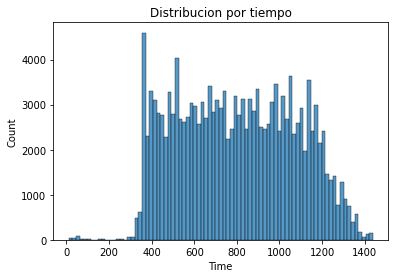

In [60]:
sns.histplot(data=df, x='Time')
plt.title('Distribucion por tiempo')
plt.show()

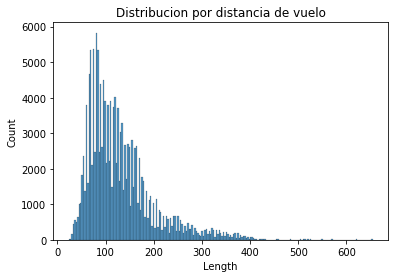

In [62]:
sns.histplot(data=df, x='Length')
plt.title('Distribucion por distancia de vuelo')
plt.show()

### CATEGORICAL DATA VISUALIZATION AND DATA CLEANING

Variables categoricas:
+ Airline          18 Aerolineas
+ Flight no se tomara como significativa por es el nombre del vuelo.
+ AirportFrom     290 Aeropuertos origen
+ AirportTo       290 Aeropuestos destino
+ DayOfWeek         7 dias de la semana

In [33]:
df = df.drop(['Flight'],axis=1)
df.head(1)

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,
1,CO,SFO,IAH,3.0,15.0,205.0,1.0


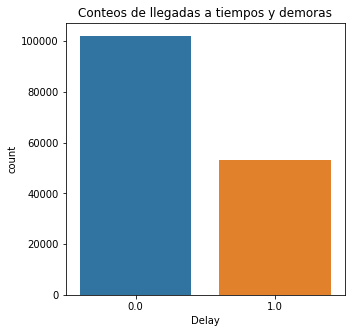

In [34]:
# Conteo de llegas a tiempo como 0 y llegadas tarde como 1
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['Delay'])
plt.title('Conteos de llegadas a tiempos y demoras')
plt.show()

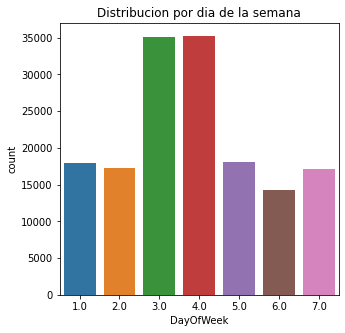

In [37]:
# Conteo por dia de la semana
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['DayOfWeek'])
plt.title('Distribucion por dia de la semana')
plt.show()

Dia 1 = Domingo y asi sucesivamente.

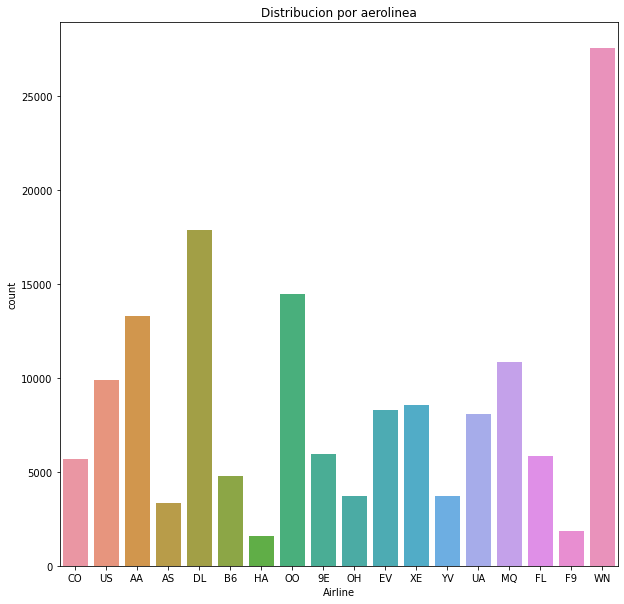

In [38]:
# Distribucion por aerolinea
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['Airline'])
plt.title('Distribucion por aerolinea')
plt.show()

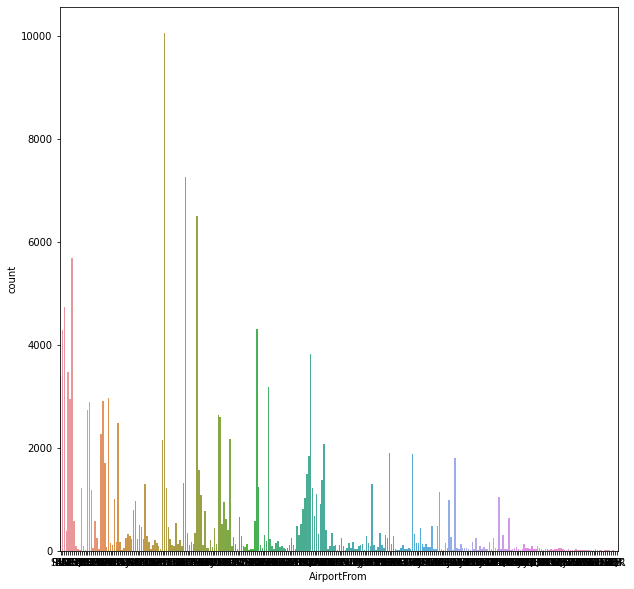

In [41]:
# Distribucion de los aeropuertos por origen
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['AirportFrom'])
plt.show()

Para mejorar los procesos tomaremos agruparemos los aeropuertos menos significativos ahorrandonos categorias.

Text(0, 0.5, 'Conteo de filas por aeropuerto origen')

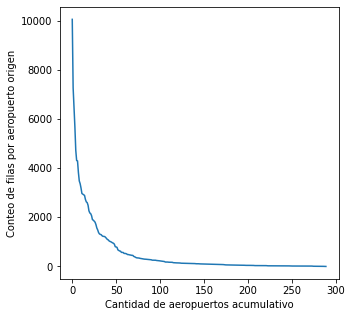

In [46]:
airfrom = df['AirportFrom'].value_counts() #Hago un conteo de los aeropuestos origen mas importantes
plt.figure(figsize=(5,5))
plt.plot(range(len(airfrom)), airfrom) #grafica de la cantidad de aeropuertos por fila
plt.xlabel('Cantidad de aeropuertos acumulativo')
plt.ylabel('Conteo de filas por aeropuerto origen')

In [48]:
# En la grafica enterior se puede apreciar que a partir de 50 aeropuertos la cantidad acumulada en vuelos no es significativa
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others') #clasifico los aeropuertos restante como 'others'

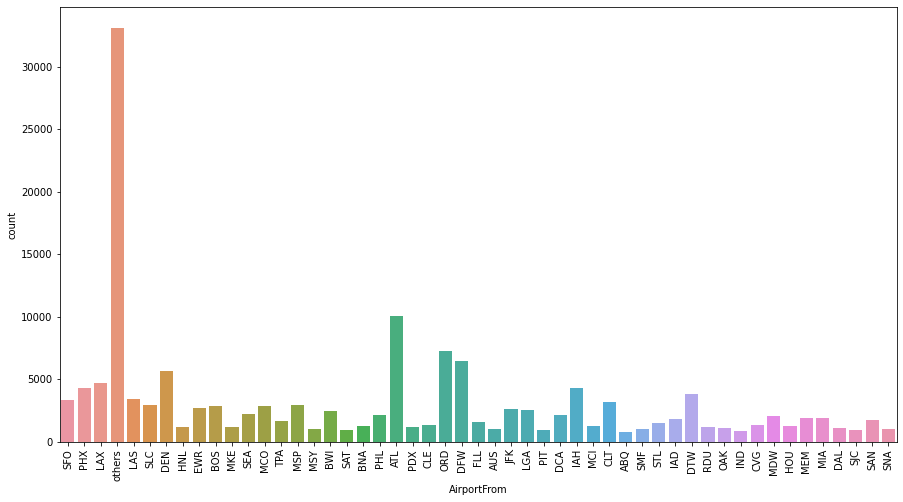

In [53]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom')
plt.xticks(rotation=90)
plt.show()

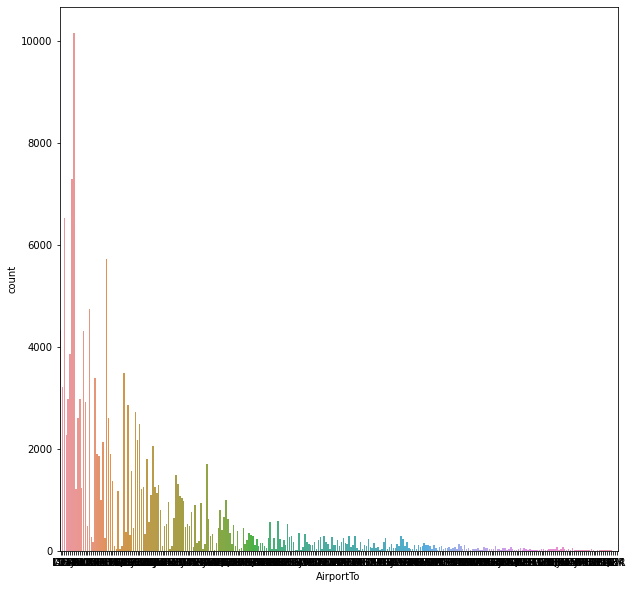

In [45]:
# Distribucion de los aeropuertos por destino
plt.figure(figsize=(10,10))
sns.countplot(data=df,x=df['AirportTo'])
plt.show()

Se realizan los mismos pasos que AirportFrom para AirportTo

Text(0, 0.5, 'Conteo de filas por aeropuerto destino')

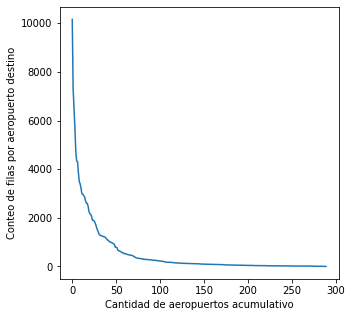

In [50]:
airto = df['AirportTo'].value_counts() #Hago un conteo de los aeropuestos destino mas importantes
plt.figure(figsize=(5,5))
plt.plot(range(len(airto)), airto) #grafica de la cantidad de aeropuertos por fila
plt.xlabel('Cantidad de aeropuertos acumulativo')
plt.ylabel('Conteo de filas por aeropuerto destino')

In [51]:
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')

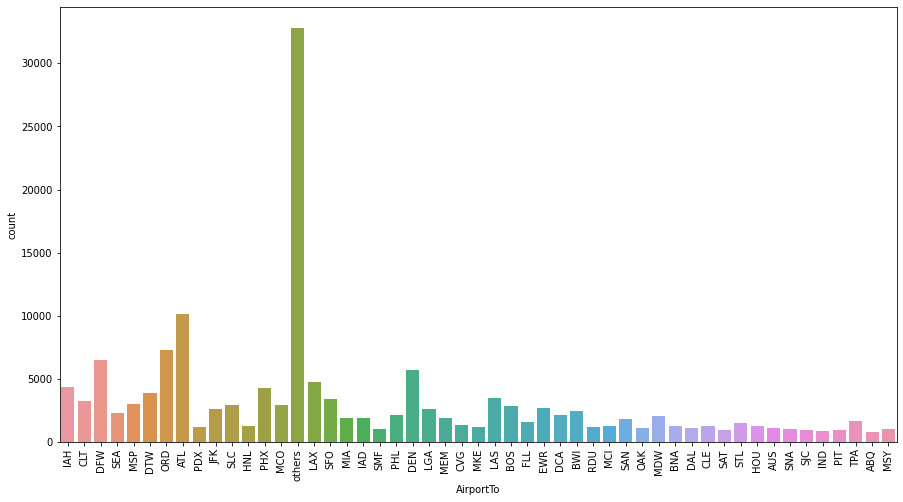

In [54]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo')
plt.xticks(rotation=90)
plt.show()

## Análisis Multivariado

En este apartado se comienza generando la matriz de correlación de manera de entender cómo las variables se relacionan entre sí. También servirá para identificar si algunas variables pueden ser utilizadas para predecir los valores de otras.

### NUMERICAL DATA VISUALIZATION

In [63]:
# se utiliza el método corr() para mostrar la relaciones entre todas las variables.
df.corr()

,DayOfWeek,Time,Length,Delay
DayOfWeek,1.000000,0.004921,0.012335,-0.005573
Time,0.004921,1.000000,-0.030458,0.136307
Length,0.012335,-0.030458,1.000000,0.036889
Delay,-0.005573,0.136307,0.036889,1.000000


Se puede deducir por los valores que no existe correlacion entre las ninguna variable.

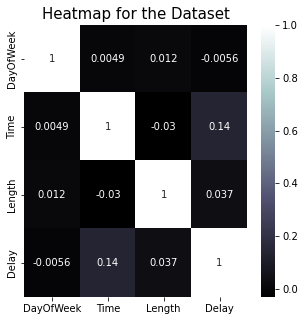

In [70]:
# aquí se muestra gráficamente la relación entre las variables.
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot = True, cmap = 'bone')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



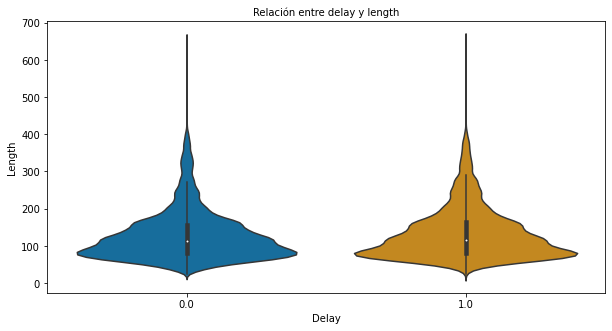

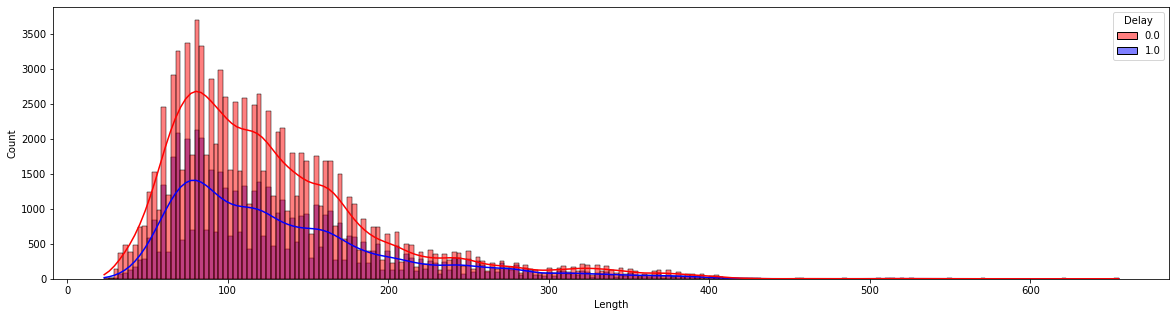

In [98]:
# delay vs length
plt.figure(figsize=(10,5))
sns.violinplot(df['Delay'], df['Length'], palette = 'colorblind')
plt.title('Relación entre delay y length', fontsize = 10, fontweight = 30)
plt.show()
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Length', hue='Delay', kde=True, palette=['red','blue'])
plt.show()

Se puede deducir el largo del vuelo no tiene un alto impacto en la demora.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



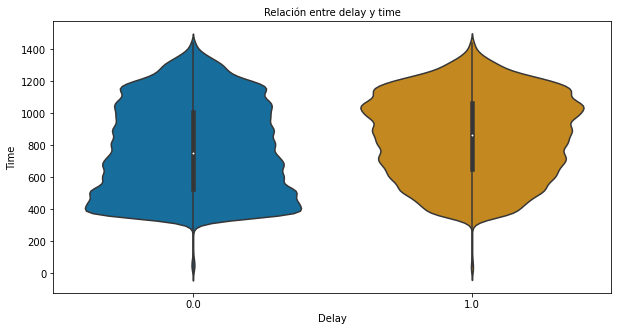

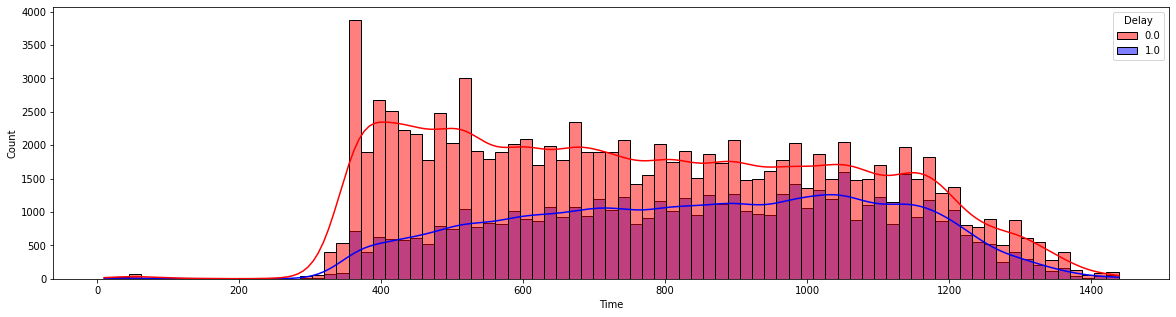

In [99]:
# delay vs time
plt.figure(figsize=(10,5))
sns.violinplot(df['Delay'], df['Time'], palette = 'colorblind')
plt.title('Relación entre delay y time', fontsize = 10, fontweight = 30)
plt.show()
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Time', hue='Delay', kde=True, palette=['red','blue'])
plt.show()

Se puede deducir la duracion del vuelo no tiene un alto impacto en la demora.
Si se puede ver ligeramente que mientras mas dura el vuelo mas es el porcentaje de delay.

### CATEGORICAL DATA VISUALIZATION

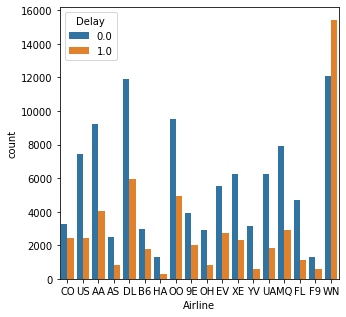

In [104]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['Airline'],hue='Delay')
plt.show()

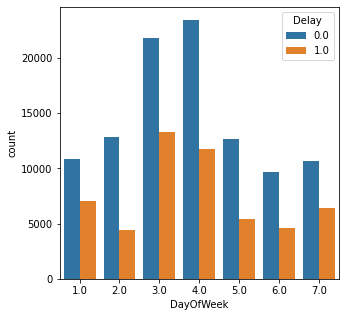

In [105]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x=df['DayOfWeek'],hue='Delay')
plt.show()

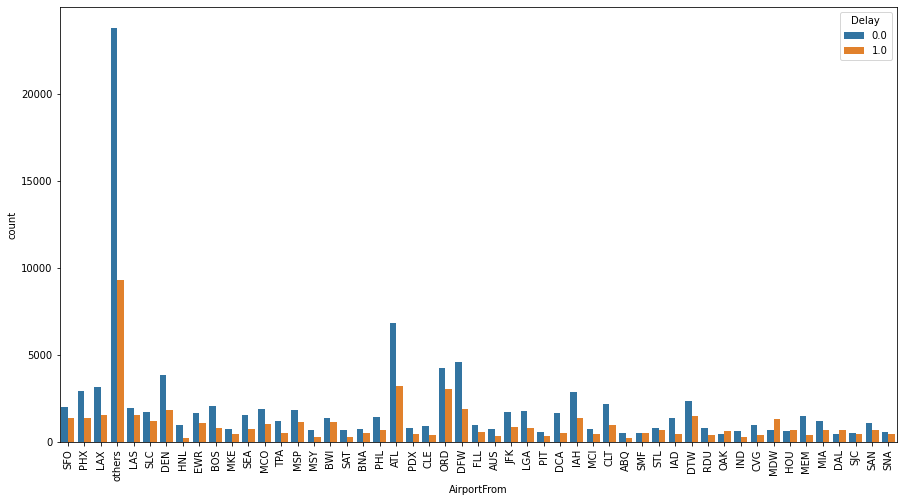

In [106]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

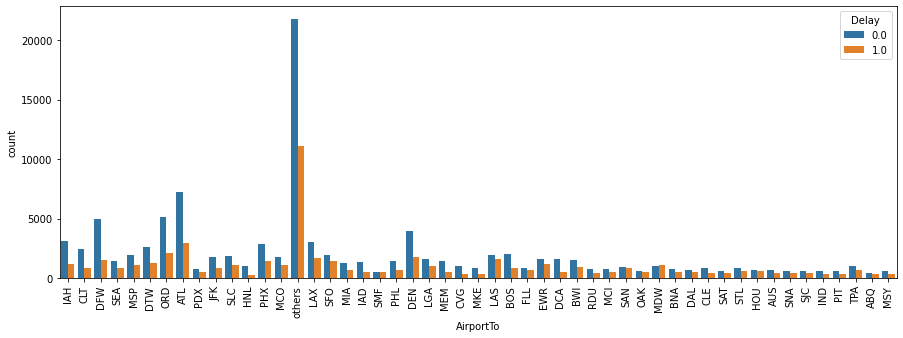

In [107]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()